Overview:
    1. Import libraries and data
    2. Data preparation, cleaning and visualization
    3. Model building
    4. Model evaluation
    5. Conclusion    

# 1. Import libraries and data

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

Quick import and look at all the colums and data types. Also check if the data was imported correctly.

In [120]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

# 2. Data Preperation, Cleaning and Visualization

Quick statisical overview of the numerical (int64,float64) data.

From the table below, there are total 891 passengers in this dataset. Survival rate is about 38%, while average age is about 29.7 year-old. 'Survived' is a categorical feature with values of 0 or 1.

In [122]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Quick statisical overview of the categorical data.

From the table below, the names of all 891 passengers are all unique. There are two genders in this dataset, while male(577) is more than female(314). 3 unique values in 'Embarked', where Embarked S is used by most of the passengers.

In [123]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Turpin, Mr. William John Robert",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


Check the the first 15 rows of data.

In [124]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


By looking at the data, I assumed 'PassengerId' and 'Ticket' are random identifiers, and they should not have impacts on the predictive results. So I dropped them here from the dataset.

In [125]:
train.drop(['PassengerId','Ticket'], axis = 1,inplace = True) #inplace = True : do this dropping on the original dataset
test.drop(['PassengerId','Ticket'], axis = 1,inplace = True)

Check the missing values in the datasets.

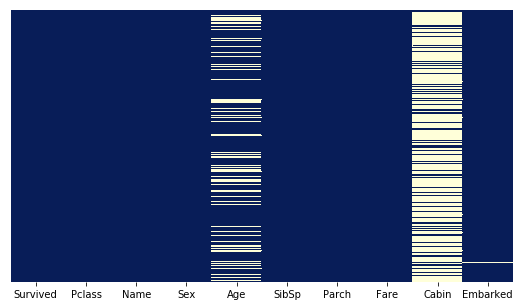

In [126]:
plt.subplots(figsize=(9,5))
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='YlGnBu_r')

There are too many missing values in 'Cabin', so I dropped it from dataset. The missing values in 'Age' and 'Embarked' would be handled later.

In [127]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

## 2.1 Exploratory Data Analysis

Plot Survived against Sex.

As we can see from the diagram, there are less female passengers in this sample but a higher survival rate of approximately 74%, while more male passengers in this dataset but a lower survival rate of about 19% only.

In [128]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [129]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).count().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,male,577
0,female,314


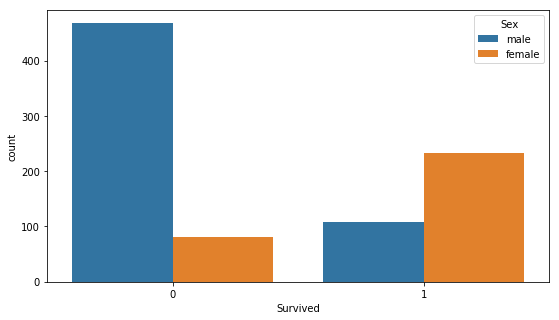

In [130]:
plt.subplots(figsize=(9,5))
sns.countplot(x='Survived', hue='Sex',data=train)

Plot Survived against Pclass.

As we can see from the diagram, The 216 passengers in Pclass 1 have the highest survival rate of about 63%. The lower survival rate is approximately 24% in Pclass 3, and more than half of the total 891 passengers are from Pclass 3.

In [131]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [132]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Pclass,Survived
2,3,491
0,1,216
1,2,184


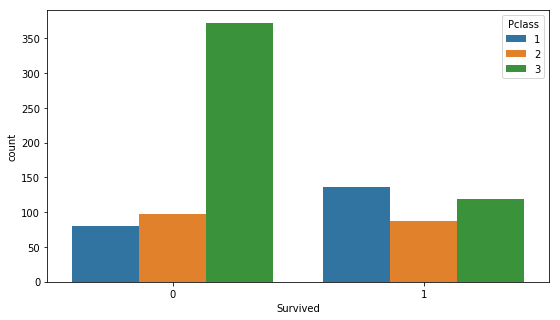

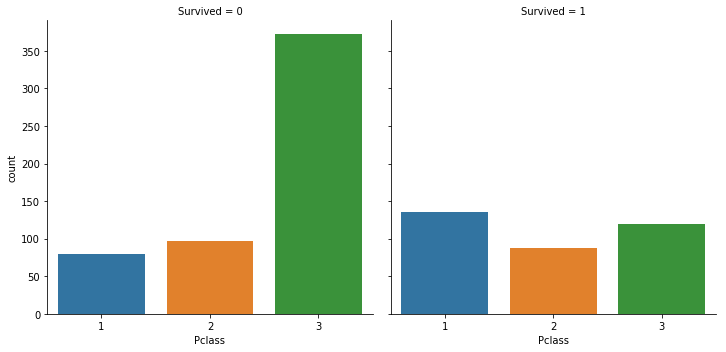

In [133]:
plt.subplots(figsize=(9,5))
sns.countplot(x='Survived', hue='Pclass', data=train)

#plt.subplots(figsize=(9,5))
sns.catplot(x='Pclass', col='Survived', data=train, kind='count')

Plot Survived against Embarked

As we can see from the diagram, The 169 passengers boarding from port C have the highest survival rate of about 55%. The 664 passengers boarding from port S have the lowest survival rate of about 34.%

In [134]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [135]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Embarked,Survived
2,S,644
0,C,168
1,Q,77


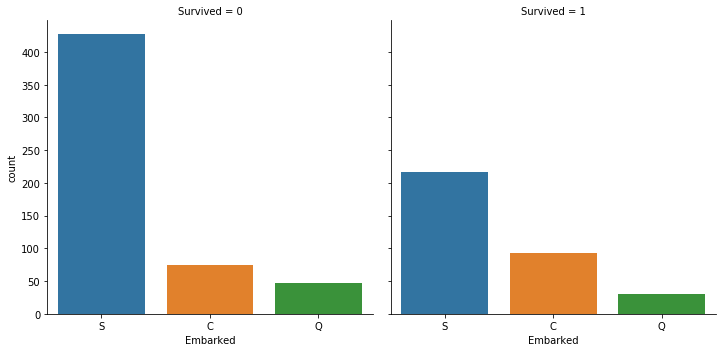

In [136]:
sns.catplot(x='Embarked', col='Survived', data=train, kind='count')

In [137]:
train[['Sex','Pclass','Embarked','Survived']].groupby(['Embarked','Pclass','Sex'], as_index=False).mean().sort_values(by='Embarked', ascending=False)

,Embarked,Pclass,Sex,Survived
17,S,3,male,0.128302
16,S,3,female,0.375000
15,S,2,male,0.154639
14,S,2,female,0.910448
13,S,1,male,0.354430
12,S,1,female,0.958333
10,Q,3,female,0.727273
11,Q,3,male,0.076923
9,Q,2,male,0.000000
8,Q,2,female,1.000000


In [138]:
train[['Sex','Pclass','Embarked','Survived']].groupby(['Embarked','Pclass','Sex'], as_index=False).count().sort_values(by='Embarked', ascending=False)

,Embarked,Pclass,Sex,Survived
17,S,3,male,265
16,S,3,female,88
15,S,2,male,97
14,S,2,female,67
13,S,1,male,79
12,S,1,female,48
10,Q,3,female,33
11,Q,3,male,39
9,Q,2,male,1
8,Q,2,female,2


c:\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\python37\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


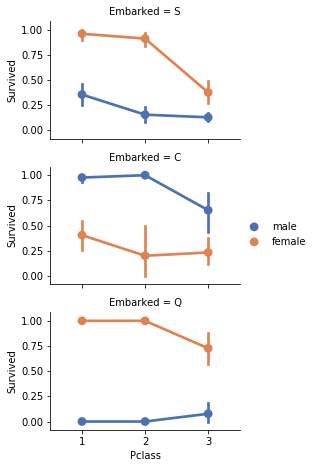

In [139]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [56]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [57]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Check the correlation matrix between 'Survived' and all other numerical features.

From the correlation heatmap below no variable seems to be highly correlated with another, so I didn't drop any.

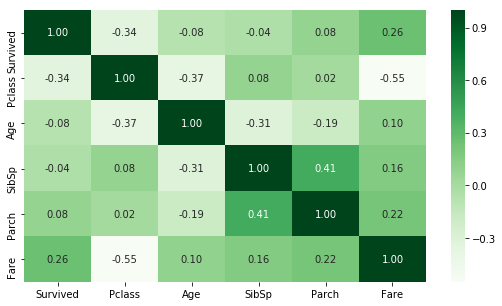

In [37]:
plt.subplots(figsize=(9,5))
ax = sns.heatmap(train[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr(),annot = True, fmt='.2f', cmap='Greens')

## 2.2 Handling Missing Data

In [140]:
# Handling the missing data in 'Age'
# Fill up with the average age of the same sex passenger in the same Pclass

train[['Sex','Pclass','Age']].groupby(['Pclass','Sex'], as_index=False).mean().sort_values(by='Age')

,Pclass,Sex,Age
4,3,female,21.750000
5,3,male,26.507589
2,2,female,28.722973
3,2,male,30.740707
0,1,female,34.611765
1,1,male,41.281386


In [141]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):
        if Pclass == 1:
            if Sex == 'male':
                return 41.3
            else:
                return 34.6
        elif Pclass == 2:
            if Sex == 'male':
                return 30.7
            else:
                return 28.7
        else:
            if Sex == 'male':
                return 36.5
            else:
                return 22.8
    else:
        return Age

train['Age'] = train[['Age','Pclass','Sex']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass','Sex']].apply(impute_age,axis=1)

In [142]:
# Handing the missing values in 'Embarked' - fill up with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

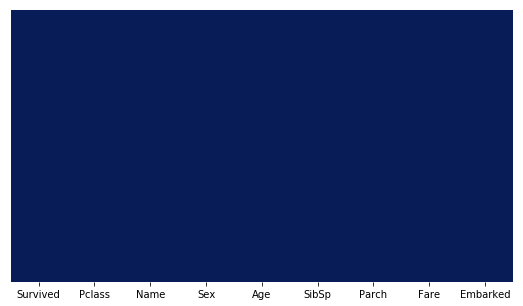

In [143]:
plt.subplots(figsize=(9,5))
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap="YlGnBu_r")

### 2.3 Feature Scaling

Normalize the range of independent variables or features of data

Here I did normalization to 'Fare' because the price range was big and the data was skewed.

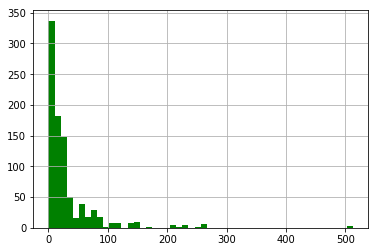

In [144]:
train['Fare'].hist(bins=50, color='g')

In [145]:
train['Fare'] = train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
test['Fare'] = test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

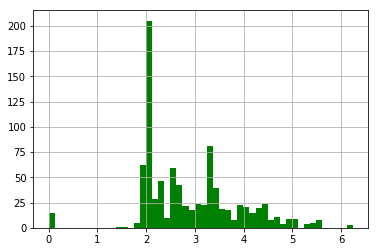

In [146]:
train['Fare'].hist(bins = 50,color="g")

### 2.4 Feature Engineering

2.4.1 Create a feature called 'FamilySize' and then drop features 'SibSp' and 'Parch'

In [147]:
#Dropping SibSp and Parch but creating a family feature with them.
train['FamilySize'] = train['SibSp'] + train['Parch'] +1
train.drop('SibSp',axis=1,inplace=True)
train.drop('Parch',axis=1,inplace=True)

test['FamilySize'] = test['SibSp'] + test['Parch'] +1
test.drop('SibSp',axis=1,inplace=True)
test.drop('Parch',axis=1,inplace=True)

2.4.2 Extract 'Title' from feature 'Name'. And convert it to contain only four unique values.

In [148]:
train_title = [i.split(',')[1].split('.')[0].strip() for i in train['Name']]
train['Title'] = pd.Series(train_title)

test_title = [i.split(',')[1].split('.')[0].strip() for i in test['Name']]
test['Title'] = pd.Series(test_title)

train['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [149]:
train['Title'] = train['Title'].replace(['Lady','the Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'rare')
train['Title'] = train['Title'].replace('Mlle','Miss')
train['Title'] = train['Title'].replace('Ms','Miss')
train['Title'] = train['Title'].replace('Mme','Mrs')

# add dummy variables to the Title column
title = pd.get_dummies(train['Title'],drop_first=True)
train = pd.concat([train,title],axis=1)
train.drop(['Name','Title'],axis=1,inplace=True)
train.head()


test['Title'] = test['Title'].replace(['Lady','the Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'rare')
test['Title'] = test['Title'].replace('Mlle','Miss')
test['Title'] = test['Title'].replace('Ms','Miss')
test['Title'] = test['Title'].replace('Mme','Mrs')

# add dummy variables to the Title column
test_title = pd.get_dummies(test['Title'],drop_first=True)
test = pd.concat([test,test_title],axis=1)
test.drop(['Name','Title'],axis=1,inplace=True)

2.4.3 add dummy variables to Sex and Embarked

In [150]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train, sex, embarked], axis = 1)
train.drop(['Sex','Embarked'], axis=1, inplace=True)
train.head()


test_sex = pd.get_dummies(test['Sex'], drop_first=True)
test_embarked = pd.get_dummies(test['Embarked'], drop_first=True)
test = pd.concat([test, test_sex, test_embarked], axis = 1)
test.drop(['Sex','Embarked'], axis=1, inplace=True)

## 3. Model building

### 3.1 Split the dataset

In [151]:
x = train.drop('Survived',axis=1)
y = train['Survived']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

### 3.2 Hyperparameter Tuning

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1,2,3,5], "min_samples_split" : [10,11,12,13], "n_estimators": [350, 400, 450, 500,550], "max_depth":[6,7,8,9]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(train.iloc[:, 1:], train.iloc[:, 0])

print(gs.best_score_)
print(gs.best_params_)
print(gs.scorer_)

#0.8462401795735129
#{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 11, 'n_estimators': 550}
#make_scorer(accuracy_score)

0.8462401795735129
{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 11, 'n_estimators': 550}
make_scorer(accuracy_score)


### 3.3 Bulding the Random Forest Model

In [152]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=0,n_estimators=550,criterion='gini',n_jobs=-1,max_depth = 9,min_samples_leaf=3,min_samples_split= 11)
#Fitting the model to x_train and y_train
rfmodel.fit(x_train,y_train)
#Predicting the model on the x_test
predictions = rfmodel.predict(x_test)

## 4. Model evaluation

### Precision, recall, and f1-score of the predicted vs the actual result.

In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       153
           1       0.82      0.61      0.70       115

   micro avg       0.78      0.78      0.78       268
   macro avg       0.79      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [154]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[138,  15],
       [ 45,  70]], dtype=int64)

In [96]:
# Permutation Importance
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfmodel, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0433 ± 0.0121,FamilySize
0.0246 ± 0.0138,Pclass
0.0172 ± 0.0076,Mr
0.0142 ± 0.0073,Mr
0.0052 ± 0.0121,Age
0.0045 ± 0.0073,Q
0.0037 ± 0.0116,male
0.0037 ± 0.0047,rare
0.0030 ± 0.0030,Q
0.0030 ± 0.0030,rare


In [97]:
# Cross-Validation (CV)
# Apply K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rfmodel,X= x_train,y=y_train,cv=10)
accuracies #Prints out the 10 different Cross Validation scores.

array([0.80952381, 0.84126984, 0.87301587, 0.84126984, 0.88888889,
       0.85714286, 0.83870968, 0.86885246, 0.8852459 , 0.80327869])

In [98]:
accuracies.mean()

0.8507197837710795

In [155]:
x_train.head()

,Pclass,Age,Fare,FamilySize,Miss,Mr,Mrs,rare,male,Q,S
114,3,17.0,2.671269,1,1,0,0,0,0,0,0
874,2,28.0,3.178054,2,0,0,1,0,0,0,0
76,3,36.5,2.066331,1,0,1,0,0,1,0,1
876,3,20.0,2.287045,1,0,1,0,0,1,0,1
674,2,30.7,0.000000,1,0,1,0,0,1,0,1


In [156]:
test.head()

,Pclass,Age,Fare,FamilySize,Miss,Mr,Mrs,rare,male,Q,S
0,3,34.5,2.057860,1,0,1,0,0,1,1,0
1,3,47.0,1.945910,2,0,0,1,0,0,0,1
2,2,62.0,2.270836,1,0,1,0,0,1,1,0
3,3,27.0,2.159003,1,0,1,0,0,1,0,1
4,3,22.0,2.508582,3,0,0,1,0,0,0,1


In [160]:
#test.drop(['PassengerId'],axis=1,inplace=True)
Y_pred = rfmodel.predict(test)
o_test = pd.read_csv('test.csv')

submission = pd.DataFrame({
        "PassengerId": o_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)